In [1]:
import os
import io
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt
    
import cv2
from google.cloud import vision

In [2]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
def putText(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)
 
    if platform.system() == 'Darwin':
        font = 'AppleGothic.ttf'
    elif platform.system() == 'Windows':
        font = 'malgun.ttf'
        
    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)
 
    draw.text((x, y), text, font=image_font, fill=color)
    
    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
 
    return opencv_image

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'service-account-file.json'
 
client_options = {'api_endpoint': 'eu-vision.googleapis.com'}
client = vision.ImageAnnotatorClient(client_options=client_options)

In [5]:
path = 'asset/images/ocr_test1.jpg' 
with io.open(path, 'rb') as image_file:
    content = image_file.read()

In [6]:
image = vision.Image(content=content)
 
response = client.text_detection(image=image)
texts = response.text_annotations


"5
day day pay pal os os dias s
F
D10 ASN01345 (35
B5
SUBJECT NOTEBOOK
A Premium Notebook For School & Business
College ruled/252mm X 179mm
8 809387
MY
VERETAS
OXFORD
The Work Life Innovator
696286
품질경영표시
1. 품명: 3500 절취스프링 좌철 B5 80매
2. 재질: 제지
3. 원산지: 인도네시아
4. 제조원: (주)브랜빌
5. TEL: 1599-9020
Ⓡ
www.paperkorea.net
11
)
TE
el
f
I
ir
T
SC
to
ic
t
pm
ld
1 C
les
por
cat
stc
y,
ens
; it
it an
nul
r da
ction
chin
hand
ssibl
dat-"

"5"

"day"

"day"

"pay"

"pal"

"os"

"os"

"dias"

"s"

"F"

"D10"

"ASN01345"

"("

"35"

"B5"

"SUBJECT"

"NOTEBOOK"

"A"

"Premium"

"Notebook"

"For"

"School"

"&"

"Business"

"College"

"ruled"

"/"

"252mm"

"X"

"179mm"

"8"

"809387"

"MY"

"VERETAS"

"OXFORD"

"The"

"Work"

"Life"

"Innovator"

"696286"

"품질"

"경영"

"표시"

"1."

"품명"

":"

"3500"

"절취"

"스프링"

"좌철"

"B5"

"80"

"매"

"2."

"재질"

":"

"제지"

"3."

"원산지"

":"

"인도네시아"

"4."

"제조원"

":"

"("

"주"

")"

"브랜"

"빌"

"5."

"TEL"

":"

"1599-9020"

"Ⓡ"

"www.paperkorea.net"

"11"

")"

"TE"

"el"

"

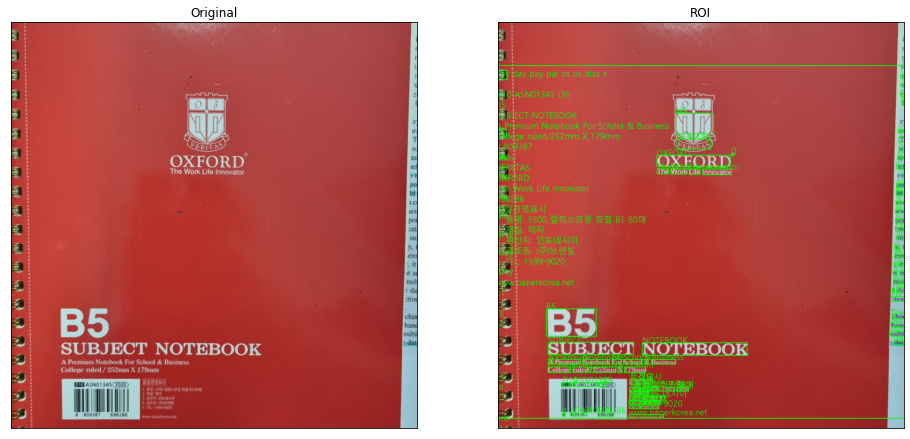

In [7]:
img = cv2.imread(path)
roi_img = img.copy()
    
for text in texts:
    print('\n"{}"'.format(text.description))
 
    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in text.bounding_poly.vertices])
    
    ocr_text = text.description
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y
    
    cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
    roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=30)
 
if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))
    
plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))